✅ Loading file: dataset.csv
--- 1. Setup and Data Loading ---
✅ Data Loaded Successfully! Shape: (1002, 17)

--- 2. Data Cleaning and Feature Engineering ---
✅ Data cleaned. Shape after cleaning: (978, 10)

--- 3. Data Splitting and Preprocessing ---
✅ Data Preprocessing Pipeline Ready.

--- 4. Hyperparameter Tuning (Grid Search) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

✅ Tuning Complete!
Best Parameters Found: {'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 500}

--- 5. Final Evaluation and Analysis ---
📊 Mean Absolute Error (MAE): $5,825.64
📈 R-squared Score (R²): 0.7623

--- 6. Feature Importance and Visualization ---


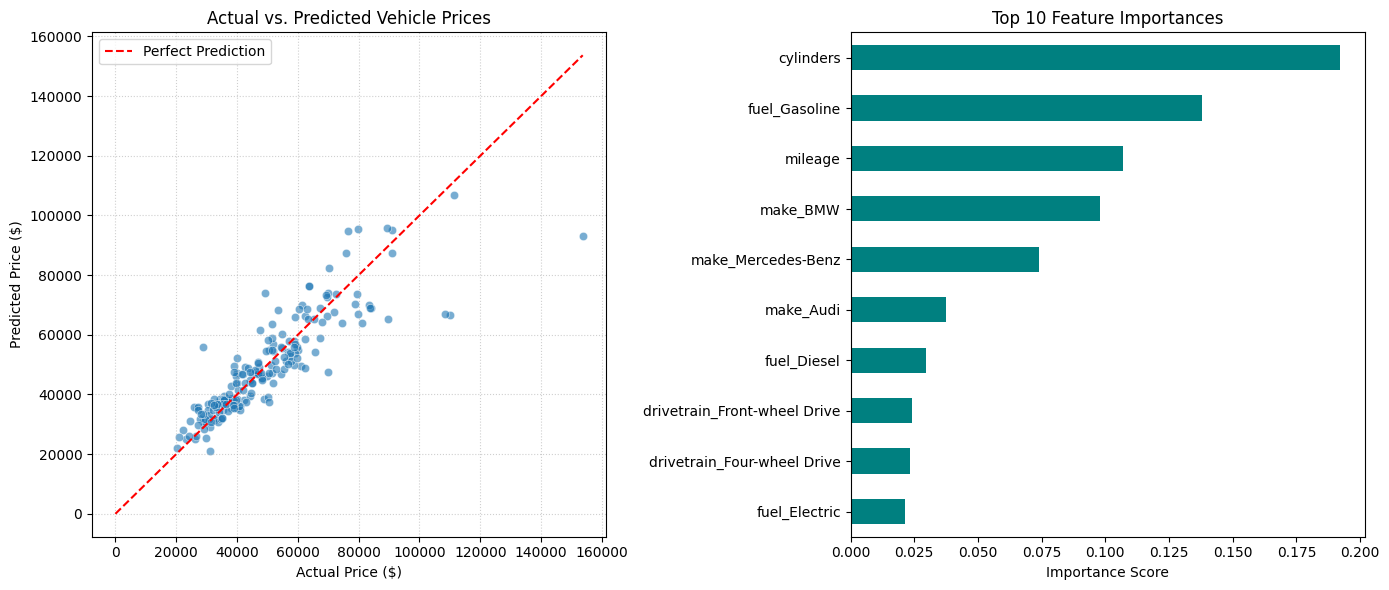

✅ Analysis Complete. Check the plots and metrics above!

💾 Model saved as 'best_vehicle_price_model.pkl'

🚗  INTERACTIVE VEHICLE PRICE PREDICTION
------------------------------------------------------------

Please enter vehicle details below:

Options: Jeep, GMC, Dodge, RAM, Nissan, Ford, Hyundai, Chevrolet...

Options: Gasoline, Diesel, Hybrid, Electric, E85 Flex Fuel, PHEV Hybrid Fuel, Diesel (B20 capable)

Options: Automatic, 6-Speed Automatic, 8-Speed Automatic, CVT, 10-Speed Automatic, 7-Speed DSG Automatic with Tiptronic

Options: SUV, Pickup Truck, Sedan, Passenger Van, Cargo Van, Hatchback, Convertible, Minivan

Options: Four-wheel Drive, All-wheel Drive, Rear-wheel Drive, Front-wheel Drive


❌ Invalid input. Please enter a valid number.




❌ Invalid input. Please enter a valid number.


❌ Invalid input. Please enter a valid number.




✅ Vehicle details received successfully!



make,fuel,transmission,body,drivetrain,mileage,Car_Age,cylinders,doors
Toyota,Gasoline,Automatic,SUV,All-wheel Drive,5000.000000,45000,4,4


In [1]:
# ================================================
# 🚗 VEHICLE PRICE PREDICTION - VS CODE NOTEBOOK VERSION
# ================================================

# --- 1. SETUP ---
# REMOVED: from google.colab import files (This is the only line removed)
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import joblib

# --- 1A. Load Dataset (Modified for local path) ---
# Put your CSV file name here (ensure it is in the same folder as this notebook)
file_name = "dataset.csv" 

print(f"✅ Loading file: {file_name}")

# --- 1B. Load Dataset ---
print("--- 1. Setup and Data Loading ---")
try:
    df = pd.read_csv(file_name)
    print(f"✅ Data Loaded Successfully! Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: File '{file_name}' not found. Please place the CSV in this folder.")
    # In VS Code, we don't raise an error here to prevent the cell from stopping
    df = None 

if df is not None:
    # ================================================
    # YOUR ORIGINAL CODE CONTINUES BELOW (UNTOUCHED)
    # ================================================

    # --- 2. DATA CLEANING AND FEATURE ENGINEERING ---
    print("\n--- 2. Data Cleaning and Feature Engineering ---")

    # A. Remove unrealistic prices and irrelevant columns
    df_clean = df[df['price'] > 1000].copy()
    df_clean.drop(columns=['description', 'name', 'model', 'trim',
                           'exterior_color', 'interior_color', 'engine'],
                  inplace=True, errors='ignore')

    # B. Feature Engineering: Create 'Car_Age'
    current_year = 2025
    df_clean['Car_Age'] = current_year - df_clean['year']
    df_clean.drop(columns=['year'], inplace=True)

    # C. Handle Missing Values
    numerical_cols_to_impute = ['cylinders', 'mileage', 'doors']
    categorical_cols_to_impute = ['fuel', 'transmission', 'body']

    # Impute numerical with median
    for col in numerical_cols_to_impute:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)

    # Impute categorical with mode
    for col in categorical_cols_to_impute:
        if col in df_clean.columns:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

    print(f"✅ Data cleaned. Shape after cleaning: {df_clean.shape}")


    # ================================================
    # --- 3. DATA SPLITTING AND PREPROCESSING ---
    # ================================================
    print("\n--- 3. Data Splitting and Preprocessing ---")

    # Define numerical and categorical features
    numerical_features = ['mileage', 'Car_Age', 'cylinders', 'doors']
    categorical_features = ['make', 'fuel', 'transmission', 'body', 'drivetrain']

    # Define features (X) and target (y)
    X = df_clean.drop('price', axis=1)
    y = df_clean['price']

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preprocessor setup
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ]
    )

    print("✅ Data Preprocessing Pipeline Ready.")

    # ================================================
    # --- 4. HYPERPARAMETER TUNING (GRID SEARCH) ---
    # ================================================
    print("\n--- 4. Hyperparameter Tuning (Grid Search) ---")

    # Pipeline: Preprocessing + Random Forest
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    # Define parameter grid
    param_grid = {
        'regressor__n_estimators': [200, 500],
        'regressor__max_depth': [10, 20],
        'regressor__min_samples_split': [5, 10]
    }

    # Run grid search
    grid_search = GridSearchCV(
        rf_pipeline,
        param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    # Best model
    best_rf_model = grid_search.best_estimator_

    print("\n✅ Tuning Complete!")
    print(f"Best Parameters Found: {grid_search.best_params_}")

    # ================================================
    # --- 5. MODEL EVALUATION ---
    # ================================================
    print("\n--- 5. Final Evaluation and Analysis ---")

    # Predict on test data
    y_pred = best_rf_model.predict(X_test)

    # Metrics
    final_mae = mean_absolute_error(y_test, y_pred)
    final_r2 = r2_score(y_test, y_pred)

    print(f"📊 Mean Absolute Error (MAE): ${final_mae:,.2f}")
    print(f"📈 R-squared Score (R²): {final_r2:.4f}")

    # ================================================
    # --- 6. FEATURE IMPORTANCE & VISUALIZATION ---
    # ================================================
    print("\n--- 6. Feature Importance and Visualization ---")

    # Extract one-hot encoded feature names
    one_hot_features = list(
        best_rf_model['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )
    feature_names = numerical_features + one_hot_features

    # Compute feature importances
    importances = best_rf_model['regressor'].feature_importances_
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    # --- Visualization ---
    plt.figure(figsize=(14, 6))

    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    max_val = max(y_test.max(), y_pred.max())


    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')
    plt.title('Actual vs. Predicted Vehicle Prices')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)

    # Feature Importances
    plt.subplot(1, 2, 2)
    feature_importances.head(10).plot(kind='barh', color='teal')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

    print("✅ Analysis Complete. Check the plots and metrics above!")

    # ================================================
    # --- 7. SAVE MODEL ---
    # ================================================
    joblib.dump(best_rf_model, 'best_vehicle_price_model.pkl')
    print("\n💾 Model saved as 'best_vehicle_price_model.pkl'")

    # ================================================
    # --- 8. INTERACTIVE VEHICLE PRICE PREDICTION ---
    # ================================================

    from IPython.display import display, HTML
    import pandas as pd

    print("\033[1;36m\n🚗  INTERACTIVE VEHICLE PRICE PREDICTION\033[0m")
    print("\033[90m" + "-" * 60 + "\033[0m")

    # --- Helper function for input ---
    def get_input(prompt, default=None, options=None):
        """Ask user for input with options and clean spacing."""
        if options:
            print(f"\033[94mOptions:\033[0m {', '.join(options[:8])}" +
                  ("..." if len(options) > 8 else ""))
        value = input(f"\033[1m{prompt}\033[0m" + (f" (default: {default}): " if default else ": "))
        print()
        if value.strip() == "" and default is not None:
            return default
        return value.strip()

    def get_numeric_input(prompt, value_type=float, example=None):
        while True:
            try:
                value = input(f"\033[1m{prompt}\033[0m" + (f" (e.g., {example}): " if example else ": "))
                print()
                return value_type(value)
            except ValueError:
                print("\033[91m❌ Invalid input. Please enter a valid number.\033[0m\n")

    # --- OPTIONS FROM YOUR DATASET ---
    make_options = ['Jeep', 'GMC', 'Dodge', 'RAM', 'Nissan', 'Ford', 'Hyundai', 'Chevrolet',
                    'Volkswagen', 'Chrysler', 'Kia', 'Mazda', 'Acura', 'Subaru', 'Audi',
                    'BMW', 'Toyota', 'Buick', 'Mercedes-Benz', 'Honda', 'Lincoln', 'Cadillac',
                    'INFINITI', 'Lexus', 'Land Rover', 'Volvo', 'Genesis', 'Jaguar']

    fuel_options = ['Gasoline', 'Diesel', 'Hybrid', 'Electric',
                    'E85 Flex Fuel', 'PHEV Hybrid Fuel', 'Diesel (B20 capable)']

    transmission_options = ['Automatic', '6-Speed Automatic', '8-Speed Automatic', 'CVT',
                            '10-Speed Automatic', '7-Speed DSG Automatic with Tiptronic']

    body_options = ['SUV', 'Pickup Truck', 'Sedan', 'Passenger Van',
                    'Cargo Van', 'Hatchback', 'Convertible', 'Minivan']

    drivetrain_options = ['Four-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', 'Front-wheel Drive']

    # --- USER INPUTS ---
    print("\n\033[93mPlease enter vehicle details below:\033[0m\n")

    make = get_input("Enter vehicle make", default="Toyota", options=make_options)
    fuel = get_input("Enter fuel type", default="Gasoline", options=fuel_options)
    transmission = get_input("Enter transmission type", default="Automatic", options=transmission_options)
    body = get_input("Enter body type", default="SUV", options=body_options)
    drivetrain = get_input("Enter drivetrain type", default="All-wheel Drive", options=drivetrain_options)

    mileage = get_numeric_input("Enter mileage (in miles)", float, 45000)
    car_age = get_numeric_input("Enter car age (in years)", int, 4)
    cylinders = get_numeric_input("Enter number of cylinders", int, 4)
    doors = get_numeric_input("Enter number of doors", int, 4)

    # --- CREATE VEHICLE DATAFRAME ---
    user_vehicle = pd.DataFrame({
        'make': [make],
        'fuel': [fuel],
        'transmission': [transmission],
        'body': [body],
        'drivetrain': [drivetrain],
        'mileage': [mileage],
        'Car_Age': [car_age],
        'cylinders': [cylinders],
        'doors': [doors]
    })

    # --- DISPLAY INPUT SUMMARY ---
    print("\n\033[92m✅ Vehicle details received successfully!\033[0m\n")

    styled_table = user_vehicle.style.set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#1F77B4'),
            ('color', 'white'),
            ('font-size', '14px'),
            ('padding', '6px'),
            ('font-weight', 'bold'),
            ('text-align', 'center')
        ]},
        {'selector': 'td', 'props': [
            ('background-color', '#FAFAFA'),
            ('color', '#000000'),
            ('font-size', '13.5px'),
            ('padding', '8px'),
            ('font-weight', '600'),
            ('text-align', 'center')
        ]}
    ]).hide(axis="index")

    display(HTML("<h4 style='color:#1F77B4; text-align:center;'>Entered Vehicle Details:</h4>"))
    display(HTML("<div style='display:flex; justify-content:center;'>"))
    display(styled_table.set_table_attributes('style="width:80%; border-collapse:collapse;"'))
    display(HTML("</div>"))

    # --- PREDICT PRICE ---
    pred_price = best_rf_model.predict(user_vehicle)
    predicted_value = pred_price[0]

    # --- DISPLAY RESULT ---
    html_result = f"""
    <div style="border-radius: 12px; background-color:#EAF9EA; padding:20px;
                border:2px solid #2E8B57; width:60%; text-align:center; margin-top:20px;">
        <h3 style="color:#2E8B57;">💰 Predicted Vehicle Price</h3>
        <p style="font-size:24px; font-weight:bold; color:#006400;">
            ${predicted_value:,.2f}
        </p>
    </div>
    """

    display(HTML(html_result))